In [58]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

df =  df_meat_comsumption

# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

df.head()



,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   12140 non-null  object
 1   indicator  12140 non-null  object
 2   subject    12140 non-null  object
 3   measure    12140 non-null  object
 4   frequency  12140 non-null  object
 5   time       12140 non-null  int64 
 6   value      12140 non-null  object
dtypes: int64(1), object(6)
memory usage: 664.0+ KB


In [60]:

df.describe()


,time
count,12140.000000
mean,2009.042175
std,11.233660
min,1990.000000
25%,1999.000000
50%,2009.000000
75%,2019.000000
max,2028.000000


In [61]:
null_cols = df.isnull().sum()
print(null_cols)


location     0
indicator    0
subject      0
measure      0
frequency    0
time         0
value        0
dtype: int64


Como ya hemos hecho un análisis y sabemos la cantidad de columnas que no podemos usar, hacemos depuración.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Cargar datos


# Exploración de datos
print(df.head())  # Mostrar las primeras filas
print(df.describe())  # Estadísticas descriptivas
print(df.isnull().sum())  # Contar valores nulos


  location    indicator subject measure frequency  time   value
0      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990       0
1      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.808
2      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.278
3      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.244
4      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.541
               time
count  12140.000000
mean    2009.042175
std       11.233660
min     1990.000000
25%     1999.000000
50%     2009.000000
75%     2019.000000
max     2028.000000
location     0
indicator    0
subject      0
measure      0
frequency    0
time         0
value        0
dtype: int64


Hacemos un análisis exploratorio de datos

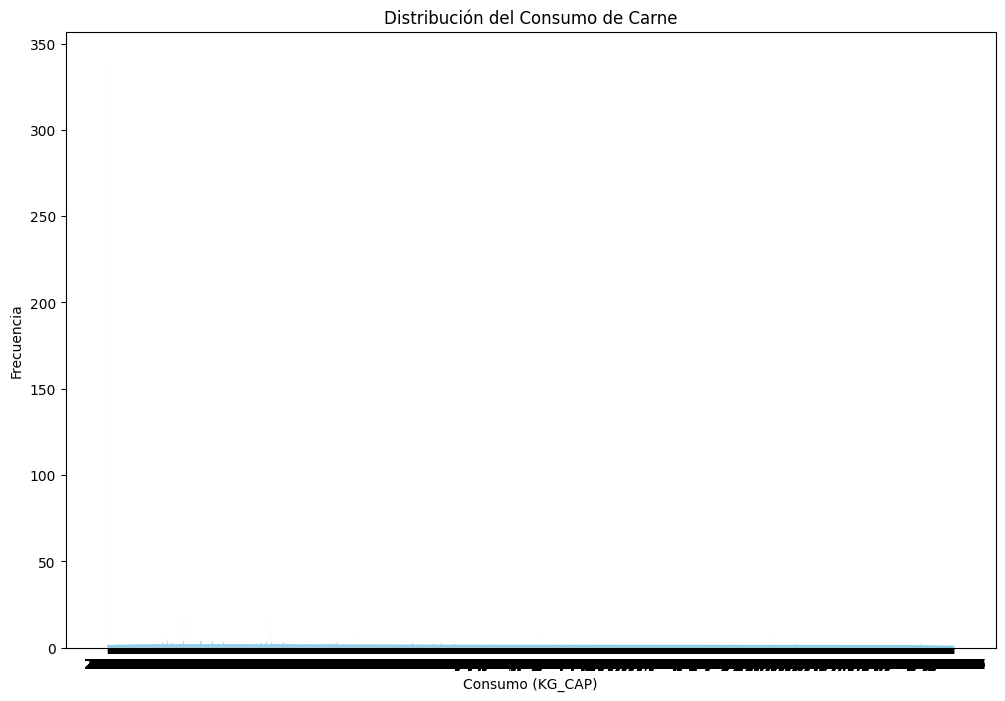

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de usar 'value ' con el espacio al final

# Histograma de la columna "value "
plt.figure(figsize=(12, 8))
sns.histplot(df['value'], kde=True, color='skyblue')  # Nota el espacio en 'value '
plt.title('Distribución del Consumo de Carne')
plt.xlabel('Consumo (KG_CAP)')
plt.ylabel('Frecuencia')
plt.show()



In [66]:
# Gráfico de líneas mostrando la tendencia del consumo a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='time', y='value ', marker='o', color='green')  # Nota el espacio en 'value '
plt.title('Tendencia del Consumo de Carne a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo (KG_CAP)')
plt.show()



ValueError: Could not interpret value `value ` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

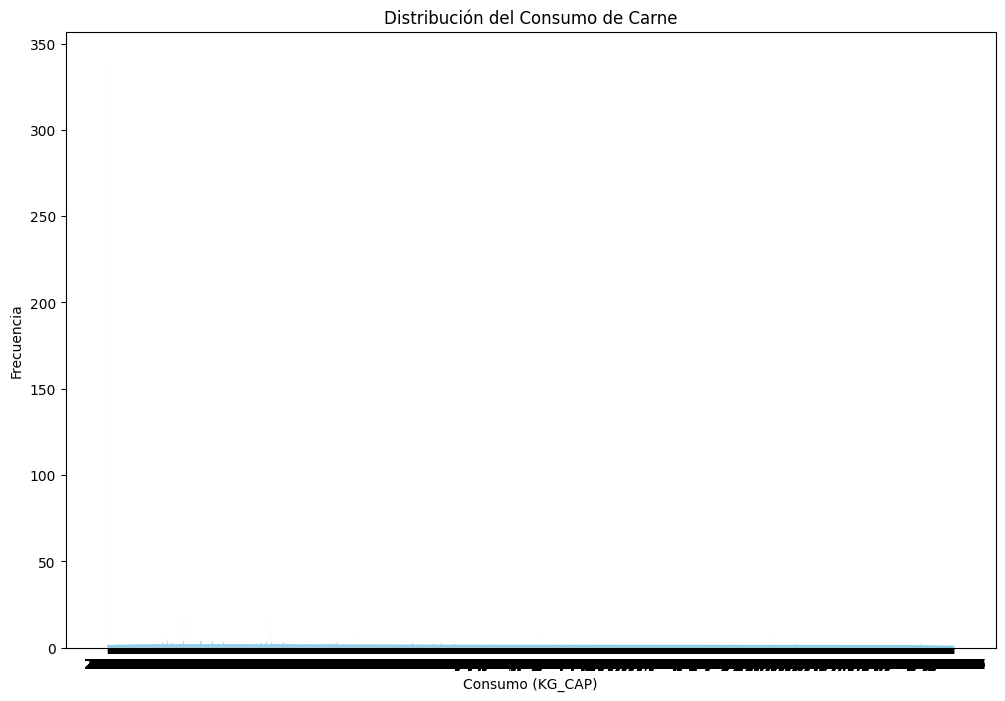

In [75]:
# Histograma de la columna "value"
plt.figure(figsize=(12, 8))
sns.histplot(df['value'], kde=True, color='skyblue')
plt.title('Distribución del Consumo de Carne')
plt.xlabel('Consumo (KG_CAP)')
plt.ylabel('Frecuencia')
plt.show()



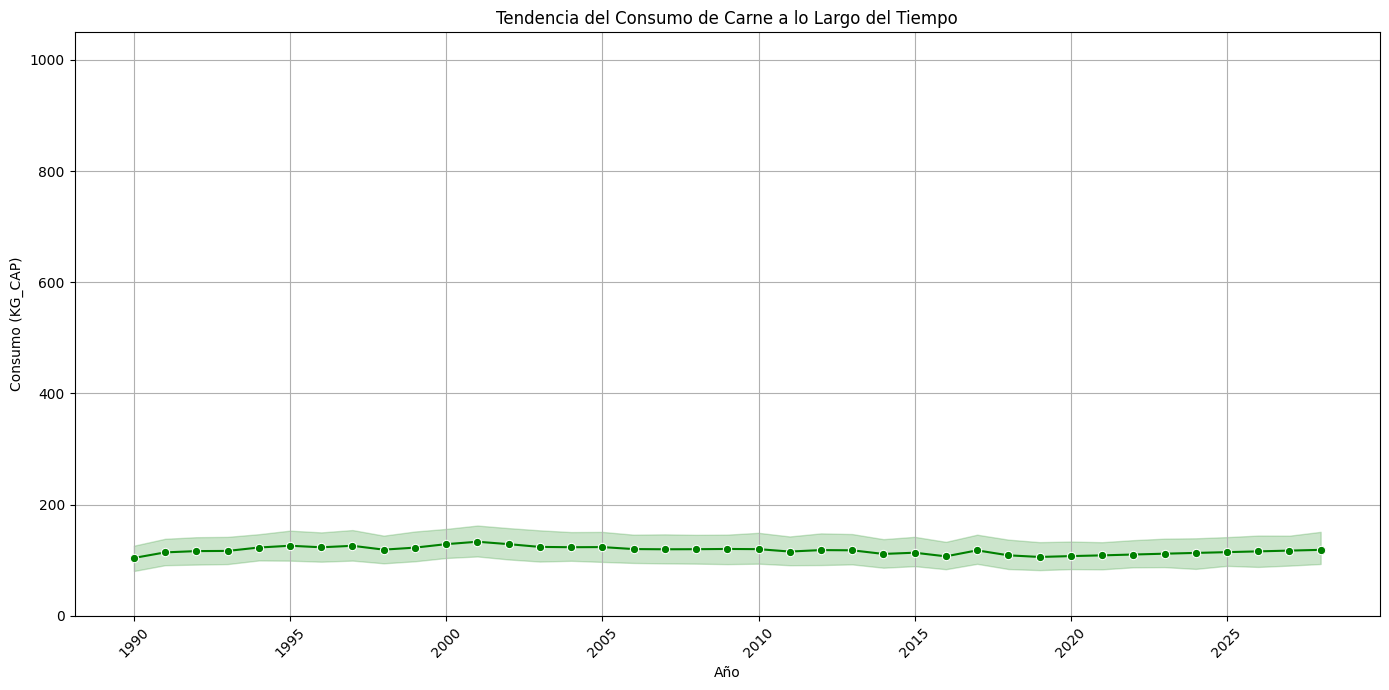

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convertir la columna 'time' a datetime y extraer el año
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year

# Convertir 'value' a tipo numérico, manejar errores de conversión
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Eliminar cualquier fila que contenga NaN en 'year' o 'value' después de las conversiones
df.dropna(subset=['year', 'value'], inplace=True)

# Ordenar los datos por año
df.sort_values('year', inplace=True)

# Gráfico de líneas mostrando la tendencia del consumo a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='value', marker='o', color='green')
plt.title('Tendencia del Consumo de Carne a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo (KG_CAP)')

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45)  # Rotar las etiquetas

# Ajustar los límites del eje Y para dar un poco de espacio en cada extremo
plt.ylim(df['value'].min() * 0.95, df['value'].max() * 1.05)

plt.grid(True)  # Añadir una cuadrícula para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()



C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_28644\3337388485.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pig.dropna(subset=['year', 'value'], inplace=True)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_28644\3337388485.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pig.sort_values('year', inplace=True)


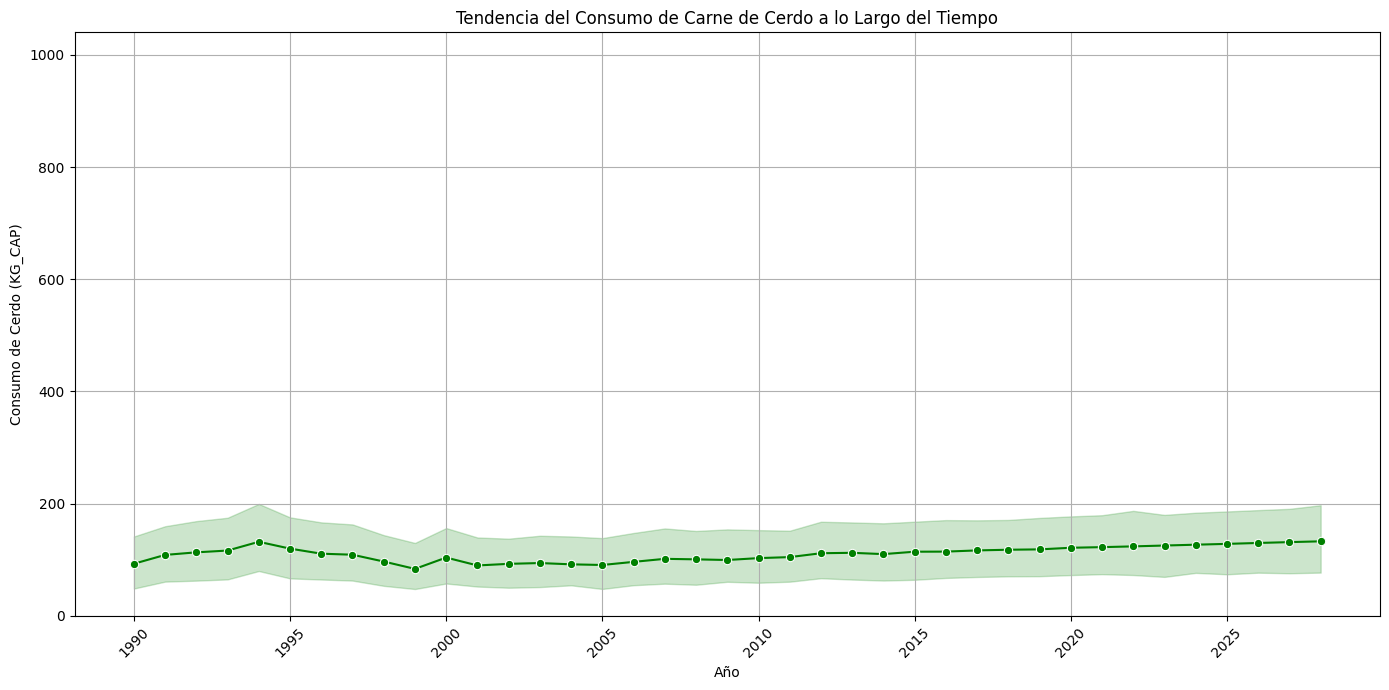

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convertir la columna 'time' a datetime y extraer el año
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year

# Convertir 'value' a tipo numérico, manejar errores de conversión
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Filtrar los datos para incluir solo el consumo de cerdo ('pig')
df_pig = df[df['subject'] == 'PIG']

# Eliminar cualquier fila que contenga NaN en 'year' o 'value' después de las conversiones
df_pig.dropna(subset=['year', 'value'], inplace=True)

# Ordenar los datos por año
df_pig.sort_values('year', inplace=True)

# Gráfico de líneas mostrando la tendencia del consumo de cerdo a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_pig, x='year', y='value', marker='o', color='green')
plt.title('Tendencia del Consumo de Carne de Cerdo a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo de Cerdo (KG_CAP)')

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45)  # Rotar las etiquetas

# Ajustar los límites del eje Y para dar un poco de espacio en cada extremo
plt.ylim(df_pig['value'].min() * 0.95, df_pig['value'].max() * 1.05)

plt.grid(True)  # Añadir una cuadrícula para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_28644\514130600.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sheep.dropna(subset=['year', 'value'], inplace=True)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_28644\514130600.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sheep.sort_values('year', inplace=True)


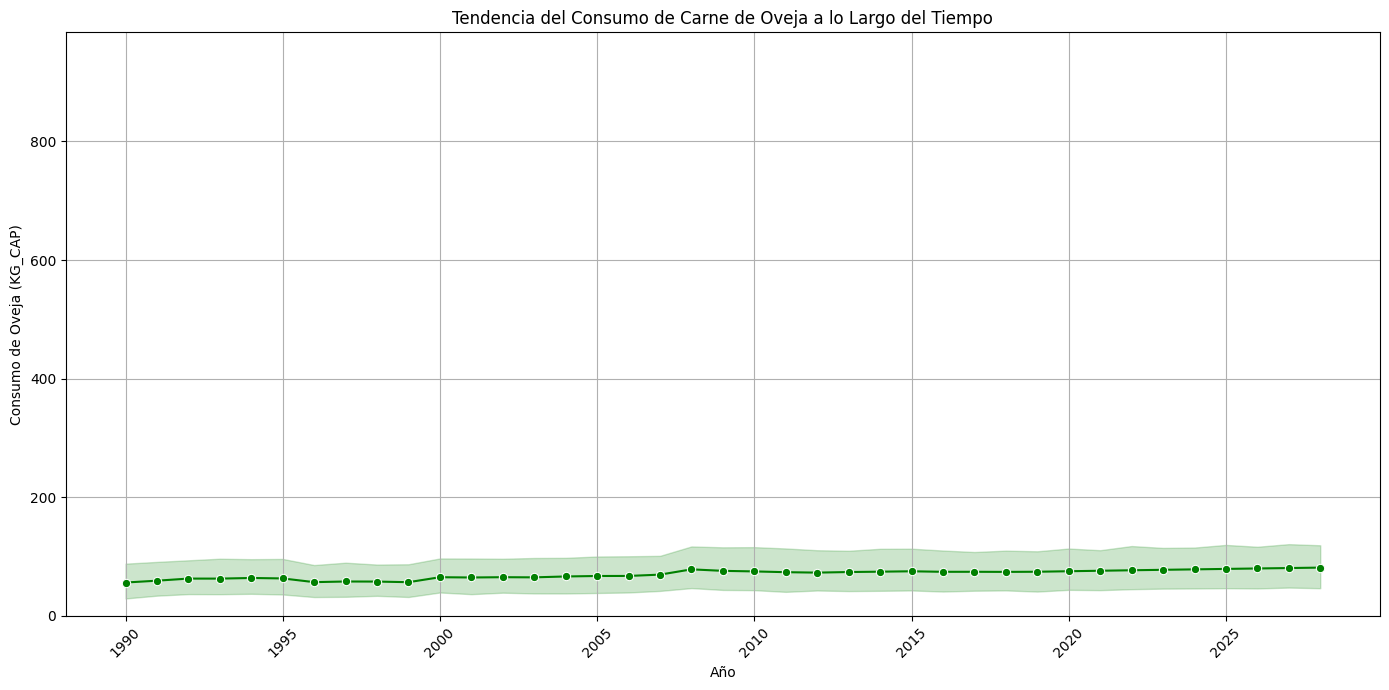

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convertir la columna 'time' a datetime y extraer el año
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year

# Convertir 'value' a tipo numérico, manejar errores de conversión
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Filtrar los datos para incluir solo el consumo de ovejas ('sheep')
df_sheep = df[df['subject'] == 'SHEEP']

# Eliminar cualquier fila que contenga NaN en 'year' o 'value' después de las conversiones
df_sheep.dropna(subset=['year', 'value'], inplace=True)

# Ordenar los datos por año
df_sheep.sort_values('year', inplace=True)

# Gráfico de líneas mostrando la tendencia del consumo de oveja a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sheep, x='year', y='value', marker='o', color='green')
plt.title('Tendencia del Consumo de Carne de Oveja a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo de Oveja (KG_CAP)')

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45)  # Rotar las etiquetas

# Ajustar los límites del eje Y para dar un poco de espacio en cada extremo
plt.ylim(df_sheep['value'].min() * 0.95, df_sheep['value'].max() * 1.05)

plt.grid(True)  # Añadir una cuadrícula para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Si df es un DataFrame
if isinstance(df, pd.DataFrame):
    df_numeric = df.select_dtypes(include=[np.number])
else:
    # Reconvertir a DataFrame si df es un ndarray (esto debería tener los nombres de columnas correctos)
    df = pd.DataFrame(df, columns=df_original.columns)
    df_numeric = df.select_dtypes(include=[np.number])

# Verificar qué columnas se están seleccionando
print("Columnas numéricas seleccionadas:", df_numeric.columns)


Columnas numéricas seleccionadas: Index(['mag_id', 's2_id'], dtype='object')


In [ ]:
print(df[['mag_id', 's2_id']].isnull().sum())



mag_id    1056660
s2_id       80192
dtype: int64


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Eliminar la columna 'mag_id' que tiene todos valores NaN
df.drop(columns=['mag_id'], inplace=True)

# Imputar 's2_id' usando la media
imputer = SimpleImputer(strategy='mean')
df['s2_id'] = imputer.fit_transform(df[['s2_id']])


In [ ]:
# Verificar el DataFrame después de las modificaciones
print(df.head())

# Si todo está correcto, procede con PCA u otro análisis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Asegúrate de seleccionar solo columnas numéricas, excluyendo cualquier columna no deseada o no numérica
numeric_cols = df.select_dtypes(include=[np.number]).columns
reduced_data = pca.fit_transform(df[numeric_cols])

print("Datos reducidos por PCA:")
print(reduced_data[:5])


   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [ ]:
print(df.dtypes)

# Análisis estadístico básico
print("Media de s2_id:", df['s2_id'].mean())
print("Desviación estándar de s2_id:", df['s2_id'].std())
print("Mediana de s2_id:", df['s2_id'].median())


cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object
Media de s2_id: 217587096.13254812
Desviación estándar de s2_id: 51067240.32849417
Mediana de s2_id: 231679003.5
